Испоритируем библиотеки, необходимые для проведения анализа

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

**Предварительный анализ и предобработка датасета**

In [13]:
#Считываем данные из файла
df=pd.read_csv("artists.csv")

In [14]:
#Выводим первые 5 строк датасета
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [15]:
#Выводим последние 5 строк датасета
df.tail()

,id,name,years,genre,nationality,bio,wikipedia,paintings
45,45,Andy Warhol,1928 – 1987,Pop Art,American,"Andy Warhol (; born Andrew Warhola; August 6, ...",https://en.wikipedia.org/wiki/Andy_Warhol,181
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311
47,47,Raphael,1483 – 1520,High Renaissance,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109
48,48,Michelangelo,1475 – 1564,High Renaissance,Italian,Michelangelo di Lodovico Buonarroti Simoni or ...,https://en.wikipedia.org/wiki/Michelangelo,49
49,49,Jackson Pollock,1912 – 1956,Abstract Expressionism,American,"Paul Jackson Pollock (; January 28, 1912 – Aug...",http://en.wikipedia.org/wiki/Jackson_Pollock,24


In [60]:
#Убираем ненужные для дальнейшего анализа столбцы: с биографией, ID и ссылкой на страницу в wiki
df.drop(["id","bio","wikipedia"],axis=1,inplace=True)

Для каждого автора произведений искусства вместо года рождения и года смерти присвоим возрастную группу относительно их возраста для простоты и наглядности дальнейшего анализа:
*   Юный - до 33 лет
*   Молодой - от 33 лет до 55 лет
*   Взрослый - от 55 до 77
*   Пристарелый - более 77

In [26]:
#Подсчитаем годы жизни авторов произведений
df_year = pd.DataFrame(df.years.str.split(' ',2).tolist(),columns = ['birth','-','death'])
df["birth"]=df_year.birth
df["death"]=df_year.death
df["birth"]=df["birth"].apply(lambda x: int(x))
df["death"]=df["death"].apply(lambda x: int(x))
df["age"]=df.death-df.birth
df['age']=df['age']


In [72]:
#Присвоим статусы относительно сроков жизни
bins=[30,55,65,77,98]
labels=["Юный","Молодой","Взрослый","Пристарелый-Старый"]
df['age_group']=pd.cut(df['age'],bins,labels=labels)

In [75]:
df = df.sort_values(by=["age"], ascending=False)
df['rank']=tuple(zip(df.age))
df['rank']=df.groupby('age',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.drop(["rank"],axis=1,inplace=True)
df.reset_index(inplace=True,drop=True)

In [74]:
df.head()

,name,years,genre,nationality,paintings,birth,death,age,age_group
0,Marc Chagall,1887 - 1985,Primitivism,"French,Jewish,Belarusian",239,1887,1985,98,Пристарелый-Старый
1,Pablo Picasso,1881 - 1973,Cubism,Spanish,439,1881,1973,92,Пристарелый-Старый
2,Joan Miro,1893 – 1983,Surrealism,Spanish,102,1893,1983,90,Пристарелый-Старый
3,Michelangelo,1475 – 1564,High Renaissance,Italian,49,1475,1564,89,Пристарелый-Старый
4,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,255,1488,1576,88,Пристарелый-Старый


In [76]:
df.tail()

,name,years,genre,nationality,paintings,birth,death,age,age_group
45,Henri de Toulouse-Lautrec,1864 – 1901,Post-Impressionism,French,81,1864,1901,37,Юный
46,Raphael,1483 – 1520,High Renaissance,Italian,109,1483,1520,37,Юный
47,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,877,1853,1890,37,Юный
48,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,193,1884,1920,36,Юный
49,Georges Seurat,1859 – 1891,Post-Impressionism,French,43,1859,1891,32,Юный


In [17]:
#Количество null значений
df.isnull().sum()

id             0
name           0
years          0
genre          0
nationality    0
bio            0
wikipedia      0
paintings      0
dtype: int64

In [18]:
#Количество уникальных значений
df.nunique()

id             50
name           50
years          50
genre          31
nationality    17
bio            50
wikipedia      50
paintings      48
dtype: int64

**Анализ датасета**

*Анализ количества и частоты написания картин различными возрастными группами и лицами разных национальностей*

Как можно заметить, наибольшее количество картин было создано на территории Франции, меньше уже в Италии и Испании

No handles with labels found to put in legend.


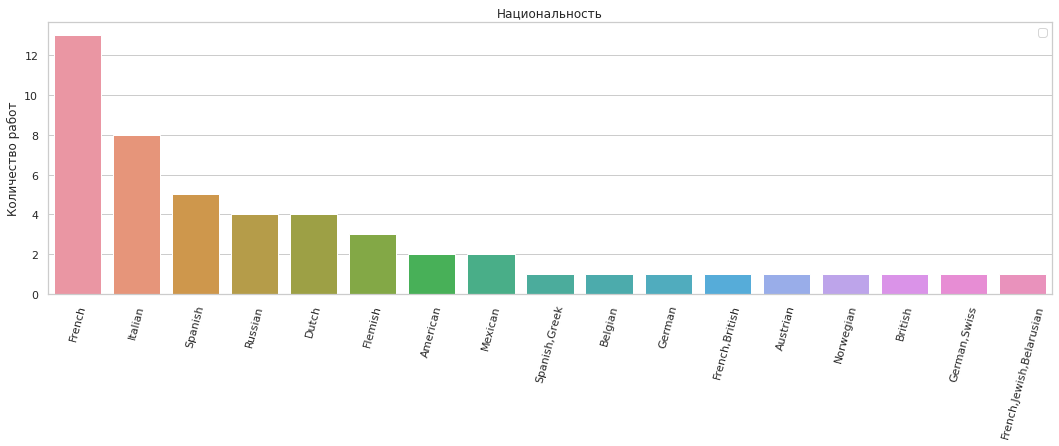

In [84]:
plt.figure(figsize=(18,5))

sns.barplot(x=df['nationality'].value_counts().index,y=df['nationality'].value_counts().values)
plt.title('Национальность')
plt.xticks(rotation=75)
plt.ylabel('Количество работ')
plt.legend(loc=0)
plt.show()

Наиболее популярными направлениями в тот период были Пост-имрессионизм, импрессионизм, Барокко и Востояный ренесанс, чуть менее популярными являлись высокий ренесанс и романтизм

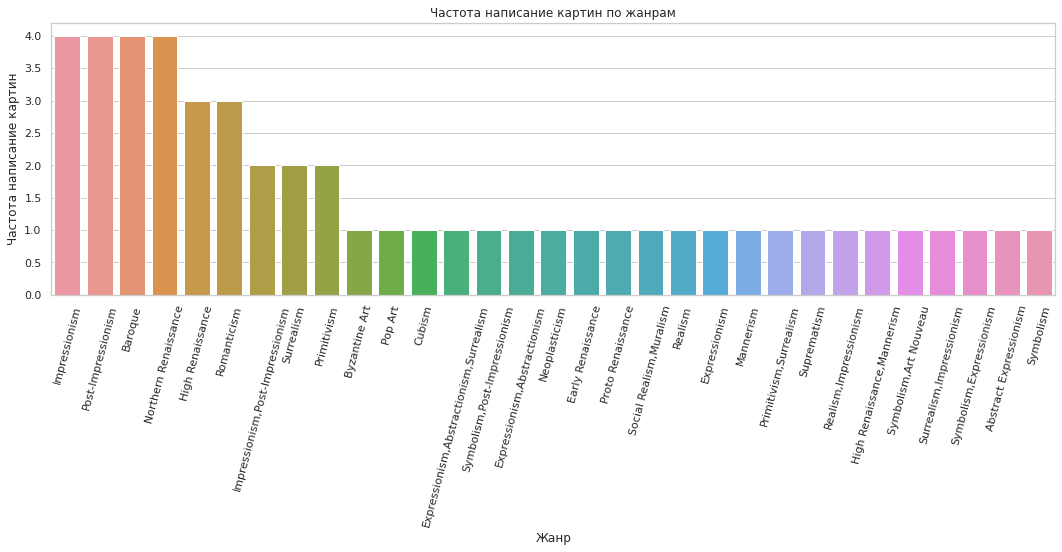

In [85]:
plt.figure(figsize=(18,5))
sns.barplot(x=df['genre'].value_counts().index,
              y=df['genre'].value_counts().values)
plt.xlabel('Жанр')
plt.xticks(rotation=75)
plt.ylabel('Частота написание картин')
plt.title('Частота написание картин по жанрам')
plt.show()

Наибольшее число наиболее популярный жанров, описанных выше, было произведено следующими возрастными группами:
*   Пост-имрпессионизм, Импрессионизм - пристарелый, чуть менее популярно данное направление у взрослой категории
*   Барокко - популярно было и молодой категории того времени
*   Восточный ренесанс - популярно у молодой категории и чуть менее интересно для взрослой и юной категорий

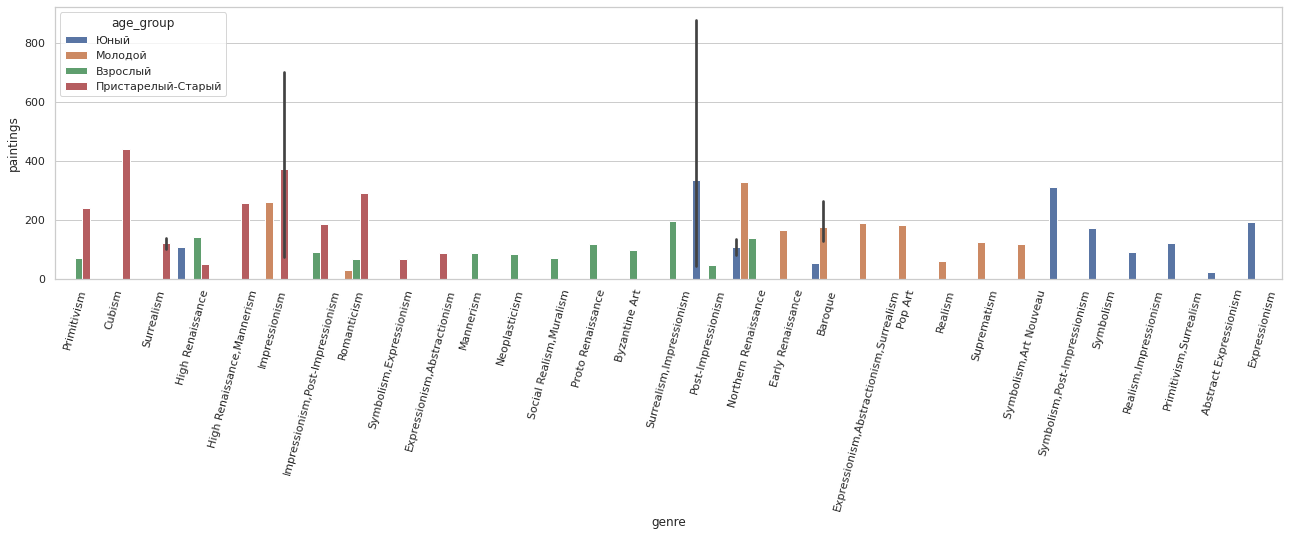

In [87]:
plt.figure(figsize=(22,5))
sns.barplot(x = "genre", y = "paintings", hue = "age_group", data = df)
plt.xticks(rotation=75)
plt.show()

Среди юных писалетелей крайне популярным направлением считалось Восточный ренесанс и Импрессионизм

Среди молодых людей были попылярны направления Высокого ренесанса и Сюрреализма и Импрессионизма

Для молодых авторов самым востребованным направлением является пост-импрессионизм 

Примитивизм является интересным направлением для творчества среди пристарелой категории авторов

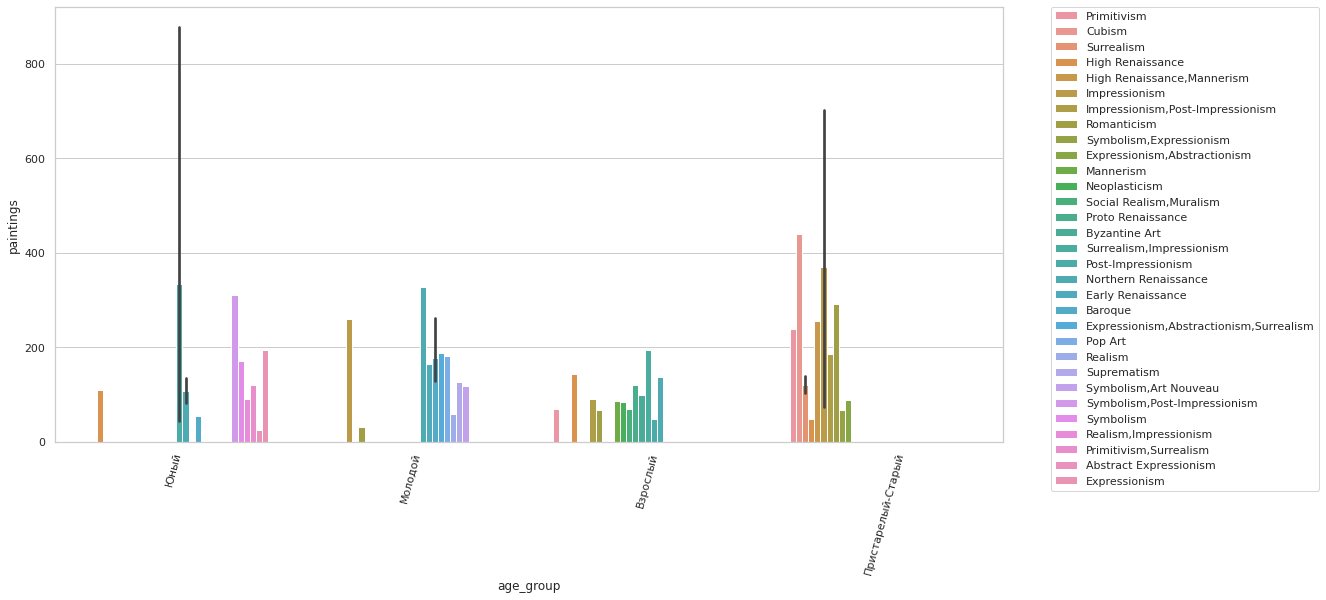

In [81]:
plt.figure(figsize=(17,8))
sns.barplot(x = "age_group", y = "paintings", hue = "genre", data = df)
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Наибольшее число авторов написало 9 картин за период своей творческой деятельности

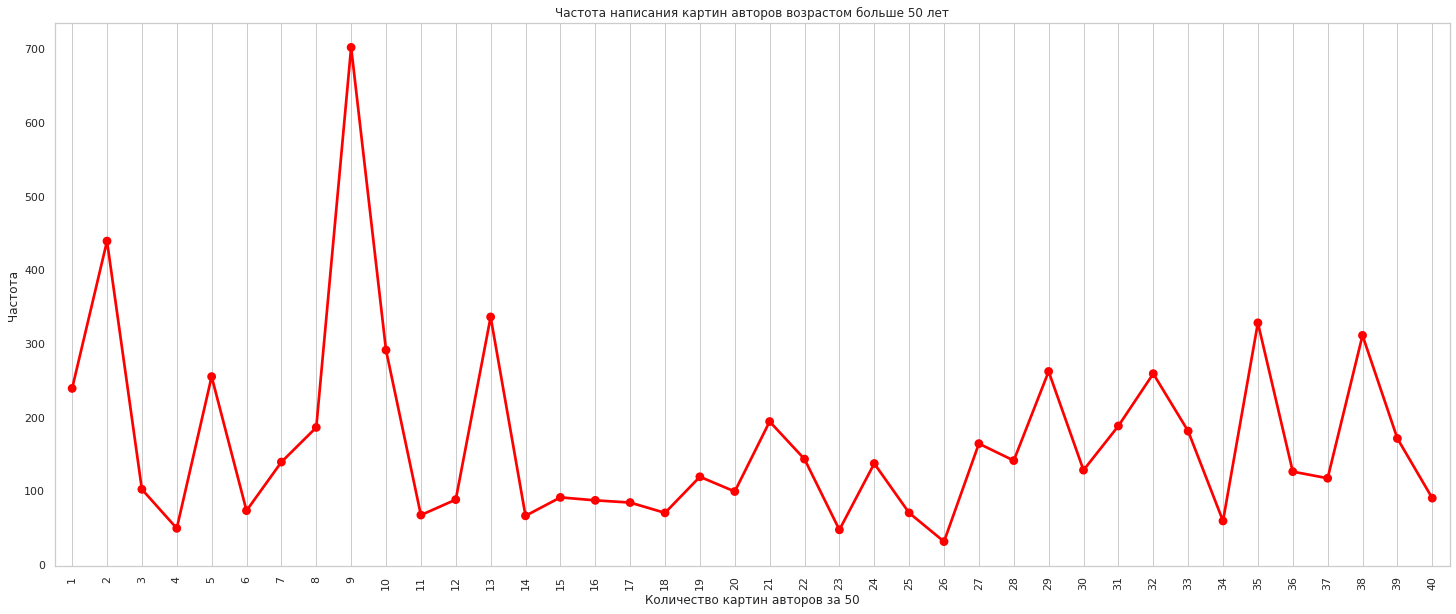

In [90]:
df['age'].unique()
len(df[(df['age']>50)].paintings)
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,41),y=df[(df['age']>50)].paintings,color='red',alpha=0.8)

plt.xlabel('Количество картин авторов за 50')
plt.ylabel('Частота')
plt.title('Частота написания картин авторов возрастом больше 50 лет')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Как можно заметить количество возрастных групп среди всех писателей примерно одинаковое

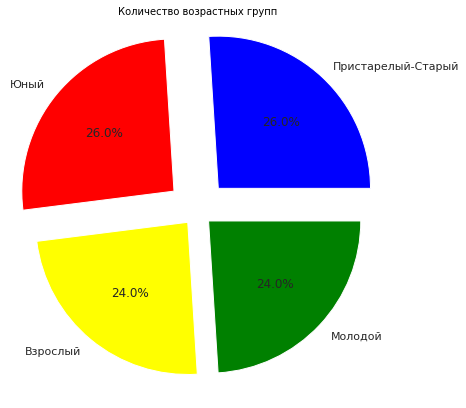

In [96]:
labels=df['age_group'].value_counts().index
colors=['blue','red','yellow','green']
explode=[0.2,0.2,0.1,0.1,]
values=df['age_group'].value_counts().values


plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Количество возрастных групп',color='black',fontsize=10)
plt.show()

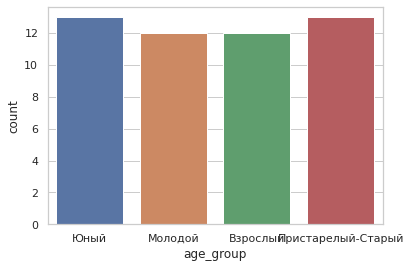

In [98]:
sns.countplot(df['age_group'])
plt.show()

*Анализ наиболее часто встречаемых и исключительных значений среди авторов картин*

В среднем авторами за все время питетельской карьеры было написано от 50 до 300 картин, большая часть из которых приходится на возраст примерно 65 лет, представители которого писали около 150 картин, данная категория наиболее выражена в прставителях, родившихся и умерших в 1800-1900 годах. 

Редким явлением являлось написания свыше 800 картин, количеством которых могут похвастаться авторы возрастной группы 35 лет (Юная возрастная группа)

<Figure size 1080x504 with 0 Axes>

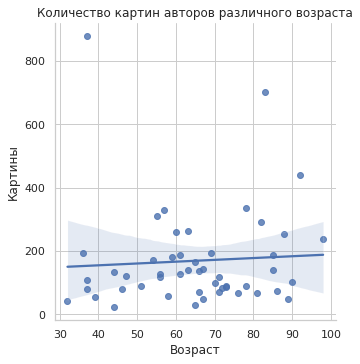

In [97]:
plt.figure(figsize=(15,7))
sns.lmplot(x='age',y='paintings',data=df)
plt.xlabel('Возраст')
plt.ylabel('Картины')
plt.title('Количество картин авторов различного возраста')
plt.show()

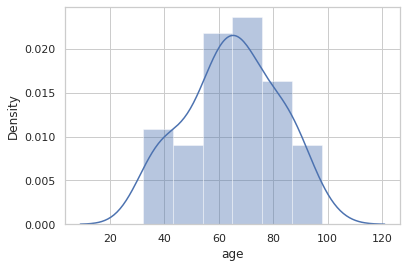

In [50]:
ax = sns.distplot(df['age'])
plt.show()

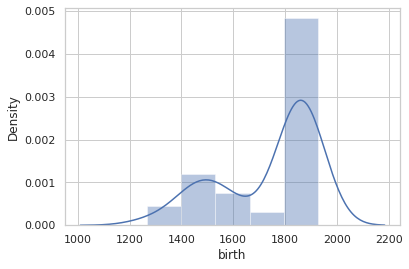

In [55]:
ax = sns.distplot(df['birth'])
plt.show()

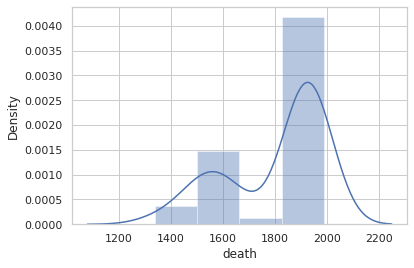

In [57]:
ax = sns.distplot(df['death'])
plt.show()

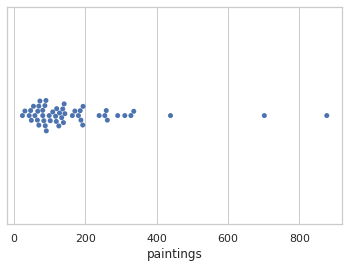

In [46]:
sns.set(style='whitegrid')
sns.swarmplot(x=df['paintings'])
plt.show()

Наибольшее количество картин было написано в Австралии в жанре импрессионизма

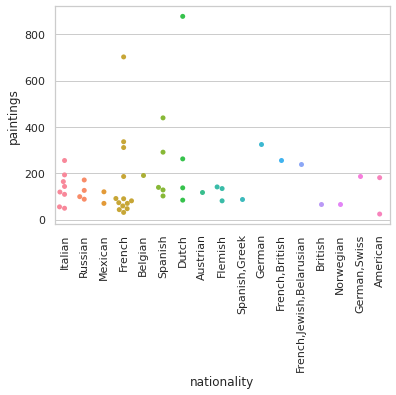

In [48]:
sns.swarmplot(x=df['nationality'],y=df['paintings'])
plt.xticks(rotation=90)
plt.show()

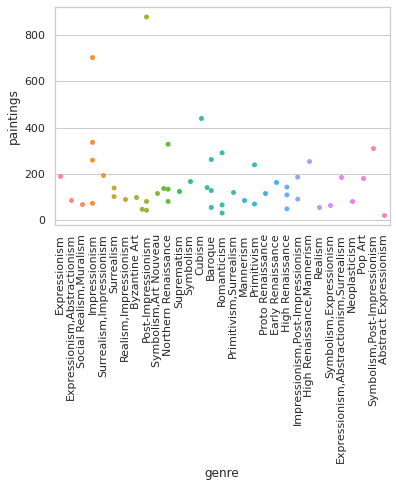

In [47]:
sns.swarmplot(x=df['genre'],y=df['paintings'])
plt.xticks(rotation=90)
plt.show()

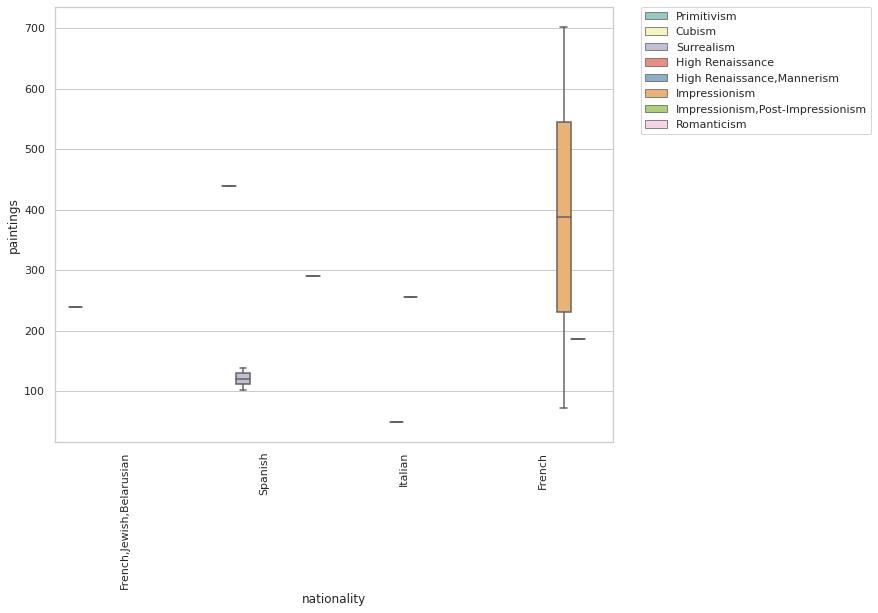

In [64]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['nationality'][:10],y=df['paintings'][:10],hue=df['genre'][:10],palette="Set3")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

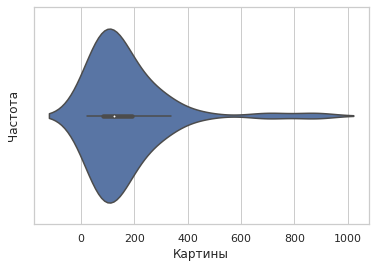

In [99]:
sns.violinplot(df['paintings'])
plt.xlabel('Картины')
plt.ylabel('Частота')
plt.show()

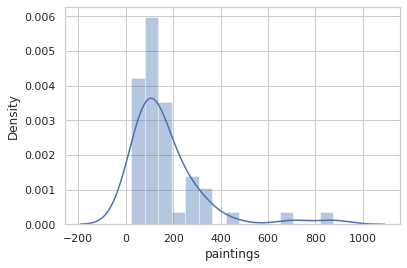

In [59]:
ax = sns.distplot(df['paintings'])
plt.show()

Среди Юной и Взрослоай категории писалетелей наиболее частое количество написанных картин - это 100, среди Молодой категории - 150, а среди Пристарелой - 200
Наиболее интересная страна в плане количества написанных картин среди различных возрастных категорий - это Франция

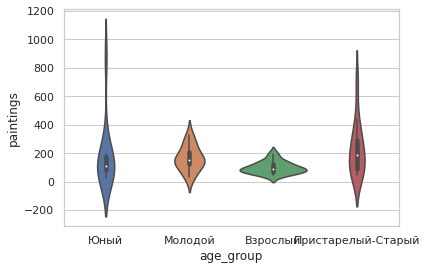

In [100]:
sns.violinplot(x=df['age_group'],y=df['paintings'])
plt.show()

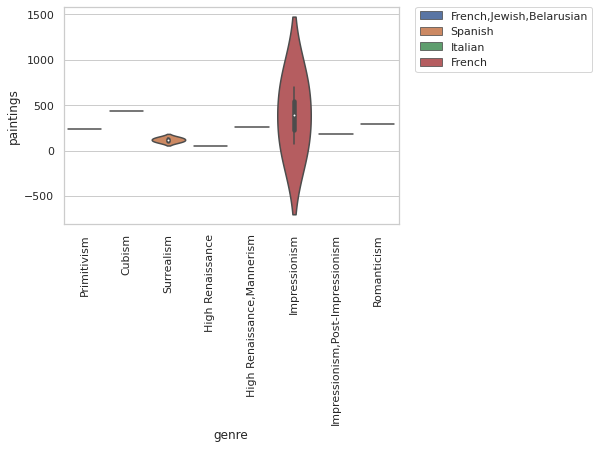

In [101]:
sns.violinplot(df['genre'][:10],df['paintings'][:10],hue=df['nationality'][:10],dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

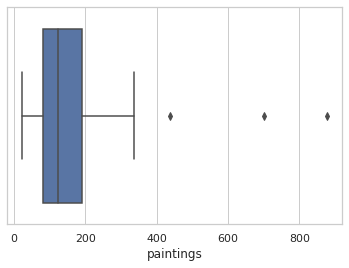

In [42]:
sns.set(style='whitegrid')
sns.boxplot(df['paintings'])
plt.show()

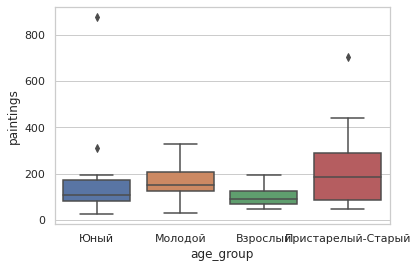

In [103]:
sns.boxplot(x=df['age_group'],y=df['paintings'])
plt.show()

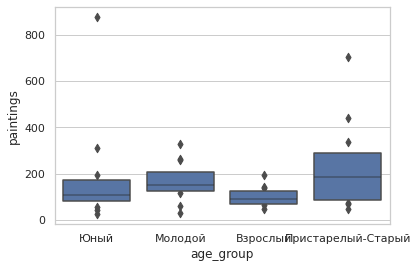

In [102]:
sns.boxenplot(x="age_group", y="paintings",
              color="b",
              scale="linear", data=df)
plt.show()

*Факторный анализ*

Как можно заметить, год рождения и смерти автора влияет на его предпочтения относительно жанра картины для каждой определенной возрастной группы.

Так, например лида Юной категории, родившиеся после 1800 года явно предпочитали Символизм, Сюрреализм и Экспрессионизм. Люди Молодой и Взрослой возрастной категории, родившиеся в тот же промежутов времени, предпочитали такие жанры как Поп-арт, Реализм и также Сюрреализм и Экспрессионизм, но при этой лица, родившиеся до 1400 года предпочитали Фото Ренессанс (возможно, это связано с появлением на тот момент новой для них технологии, что позволило открыть новое направление для творчества).

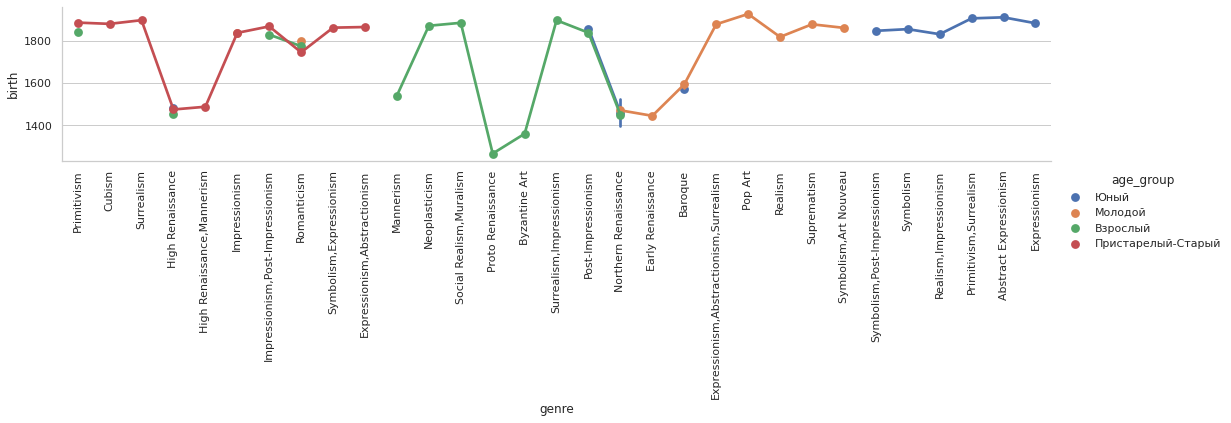

In [104]:
sns.factorplot(x="genre", y="birth", hue="age_group", data=df,size=3, aspect=5)
plt.xticks(rotation=90)
plt.show()

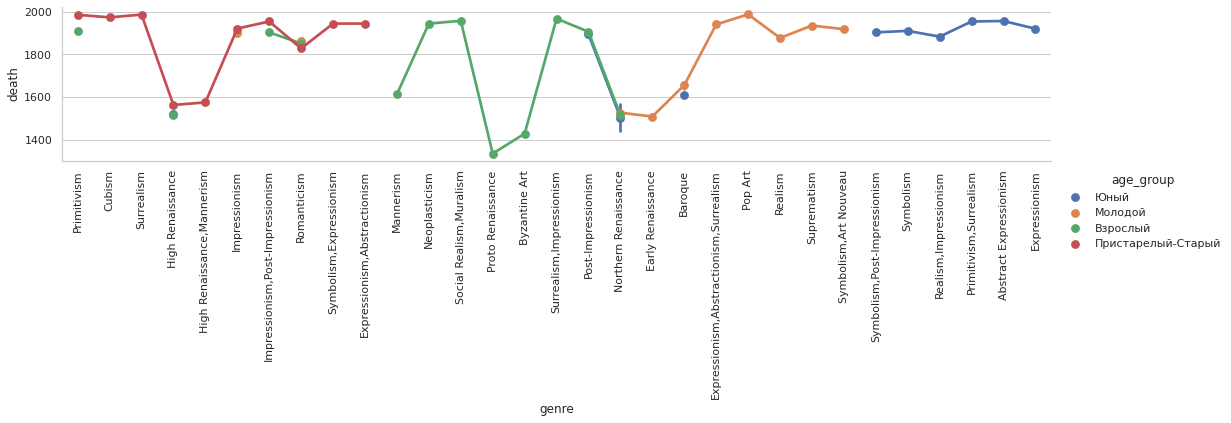

In [105]:
sns.factorplot(x="genre", y="death", hue="age_group", data=df,size=3, aspect=5)
plt.xticks(rotation=90)
plt.show()

Количество картин также зависит и от жанра, в котором их писала каждая возрастная группа. Так, Пристарелая группа, писавшая в жанре Кубизма и Импрессионизма наиболее выражена на представленном датасете, при этом Юной категорией в жанре Пост-импрессионизма написано большая часть картин, но это, скорее исключение, т.к. чаще вего Юноши того времени писали в жанре Символизм, Сюрреализм и Экспрессионизм, что позволяет наблюдать плавный разброс количества картин среди данной возрастной категории

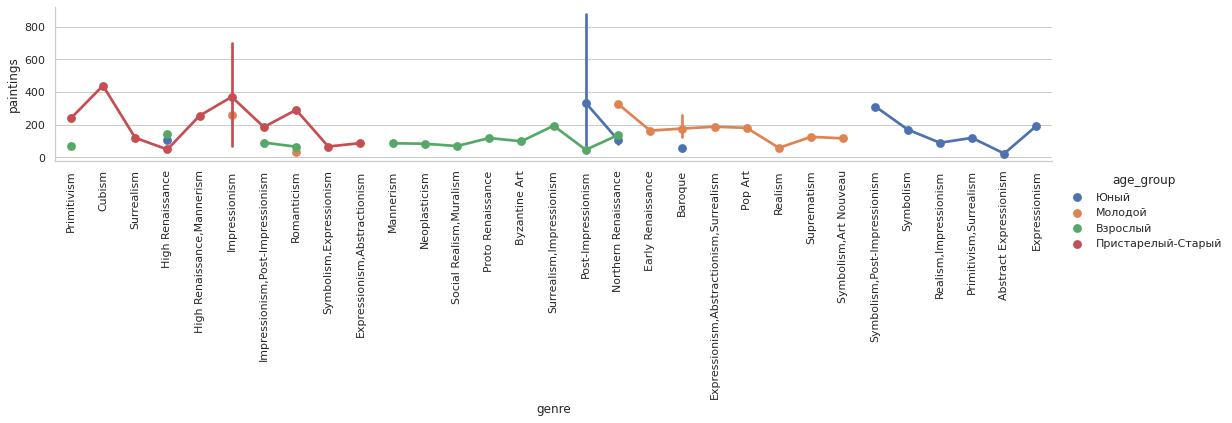

In [106]:
sns.factorplot(x="genre", y="paintings", hue="age_group", data=df,size=3, aspect=5)
plt.xticks(rotation=90)
plt.show()